In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\DATASETS\Car Ownership.csv')
print(df)


               Occupation Monthly Income  Credit Score Years of Employment  \
0                 Teacher          40000         750.0                  10   
1                Engineer          60000         800.0                   8   
2                   Nurse          25000         650.0                   5   
3                  Doctor          80000         900.0                  12   
4             Businessman         100000         700.0                  15   
..                    ...            ...           ...                 ...   
495       Project Manager        $7,000          730.0             5 years   
496                  Chef        $4,500          680.0             4 years   
497     Interior Designer        $5,500          690.0             4 years   
498     Medical Assistant        $3,500          640.0             3 years   
499  Customer Service Rep        $3,200          641.0             4 years   

    Finance Status            Finance History  Car Number of Ch

In [4]:
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


In [5]:
df.describe()

,Credit Score
count,460.000000
mean,702.969565
std,69.232323
min,500.000000
25%,650.000000
50%,700.000000
75%,750.000000
max,900.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           490 non-null    object 
 1   Monthly Income       487 non-null    object 
 2   Credit Score         460 non-null    float64
 3   Years of Employment  457 non-null    object 
 4   Finance Status       477 non-null    object 
 5   Finance History      472 non-null    object 
 6   Car                  480 non-null    object 
 7   Number of Children   375 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [8]:
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage Null Values':df.isnull().sum()*100/len(df)})
null

,Null Values,Percentage Null Values
Occupation,10,2.0
Monthly Income,13,2.6
Credit Score,40,8.0
Years of Employment,43,8.6
Finance Status,23,4.6
Finance History,28,5.6
Car,20,4.0
Number of Children,125,25.0


In [9]:
df.dropna(inplace=True)

1    207
0    108
Name: Car, dtype: int64


<AxesSubplot:xlabel='Car', ylabel='count'>

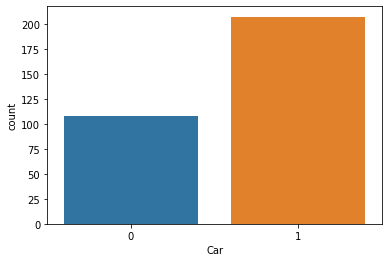

In [10]:
df['Car'] = df.Car.map({'Yes':1,'No':0})
print(df.Car.value_counts())
sns.countplot(data=df, x='Car')

# CATEGORICAL VARIABLES

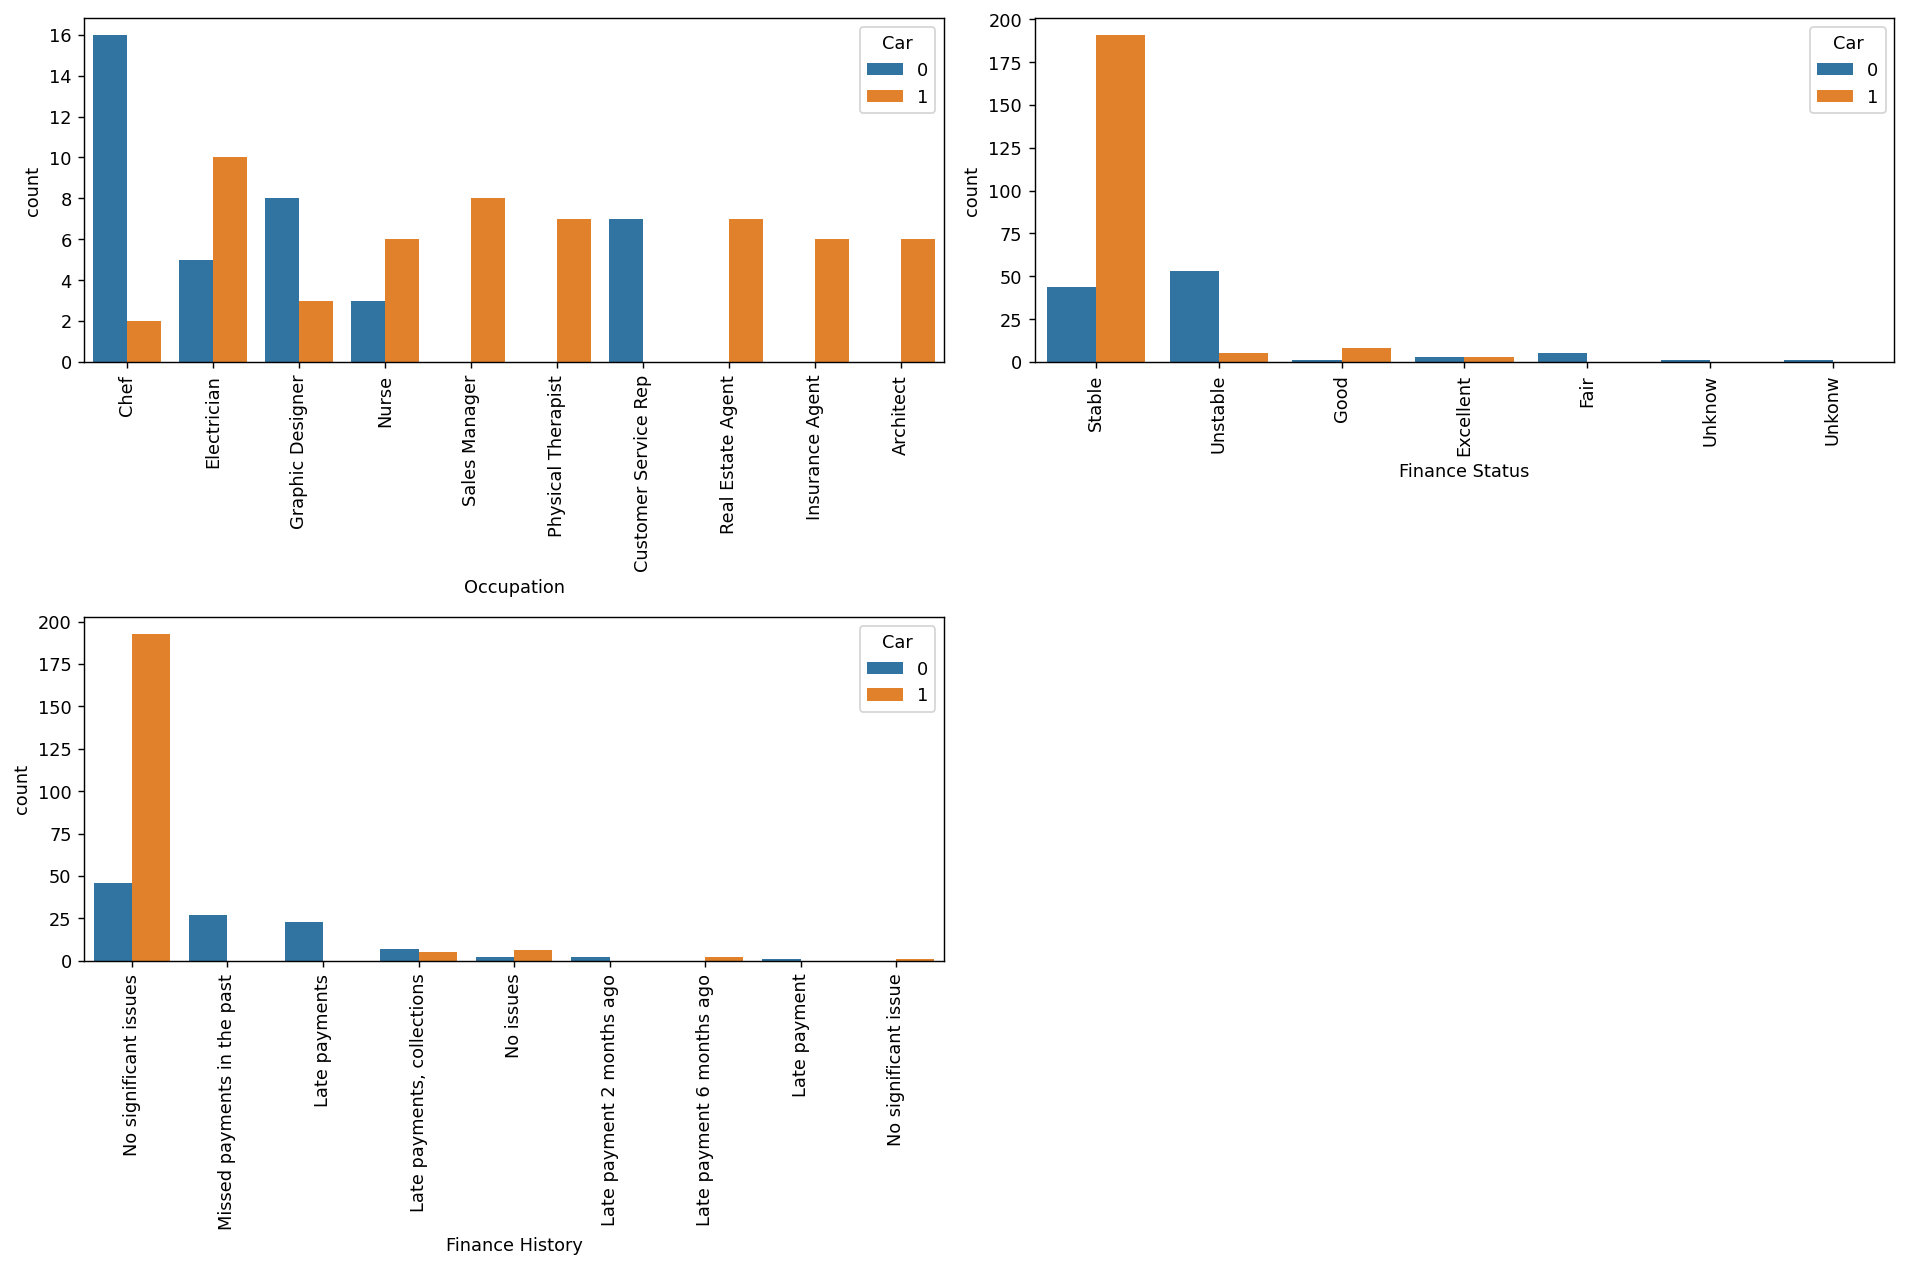

In [11]:
cat_col = ['Occupation','Finance Status','Finance History']
fig,ax = plt.subplots(dpi=128, figsize=(15,10))
for num,i in enumerate(cat_col,1):
    plt.subplot(2,2,num)
    sns.countplot(x=df[i],hue='Car',data=df,order=df[i].value_counts().head(10).index)
    plt.legend(title='Car',loc='upper right')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# DATA PREPARATION

In [12]:
# Monthly Income column
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:str(x).replace('$','').replace(',','').replace('USD','').replace('usd',''))
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:str(x).rstrip())
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:float(x[:-1])*1000 if x.endswith('k') else int(x))

# Years of Employment column
df['Years of Employment'] = df['Years of Employment'].apply(lambda x:str(x).replace(' years','').replace(' year','').replace(' y',''))

# Finance History column
df['Finance History'] = df['Finance History'].apply(lambda x:str(x).replace('No significant issues','No significant issue').replace('Late payments','Late payment'))

# Finance Status column
df['Finance Status'] = df['Finance Status'].apply(lambda x:str(x).replace('Unkonw','Unknow'))

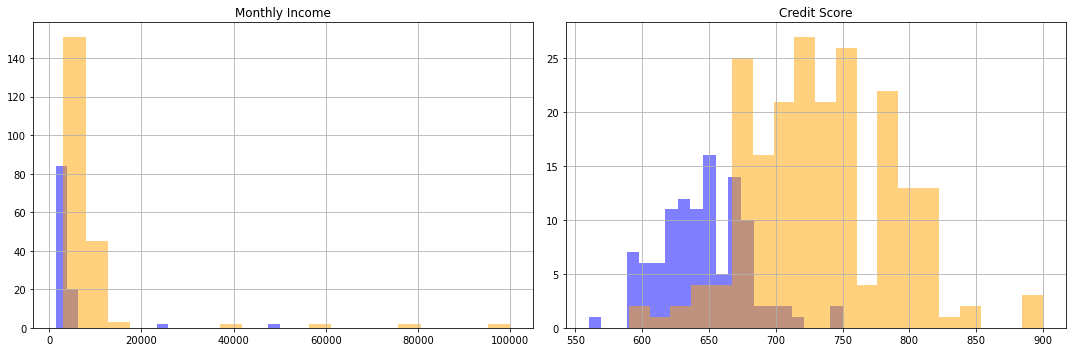

In [13]:
num_col = ['Monthly Income','Credit Score']
fig, ax = plt.subplots(1,2,figsize=(15,5))
df[df.Car == 0][num_col].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Car == 1][num_col].hist(bins=20,color='orange',alpha=0.5,ax=ax)
plt.tight_layout()
plt.show()


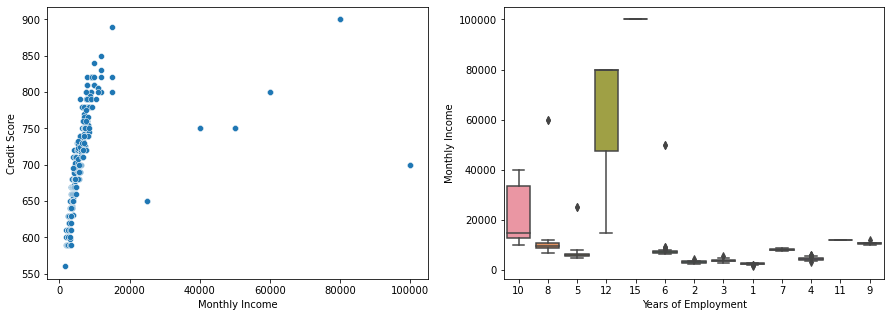

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Monthly Income',y='Credit Score')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Years of Employment',y='Monthly Income')
plt.show()

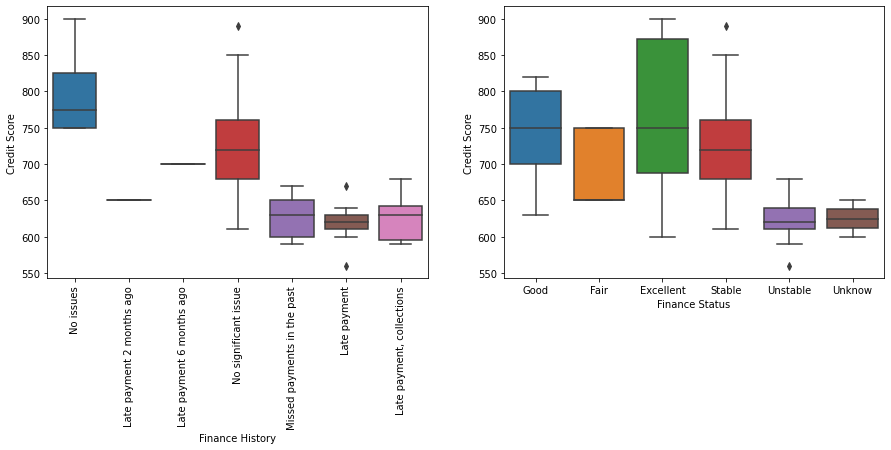

In [15]:
#CREDIT SCORE
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Finance History',y='Credit Score')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Finance Status',y='Credit Score')
plt.show()

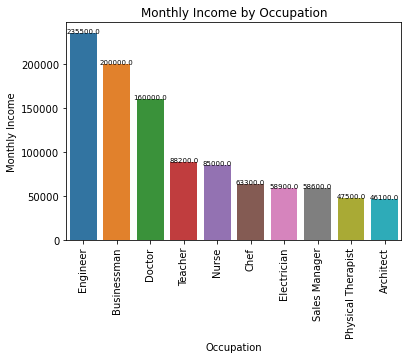

In [16]:
#OCCUPATION
occ_income = df.groupby('Occupation')['Monthly Income'].sum().reset_index().sort_values('Monthly Income',ascending=False).head(10).reset_index(drop=True)

g = sns.barplot(data=occ_income,x='Occupation',y='Monthly Income')
for v in occ_income.itertuples():
    #print(v._2)
    g.text(x=v.Index,y=v._2,s=str(round(v._2, 2)), size=7, ha="center")
plt.title('Monthly Income by Occupation')
plt.xticks(rotation=90)
plt.show()

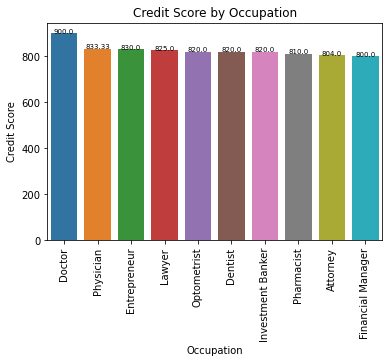

In [18]:
occ_credit = df.groupby('Occupation')['Credit Score'].mean().reset_index().sort_values('Credit Score',ascending=False).head(10).reset_index(drop=True)
g = sns.barplot(data=occ_credit,x='Occupation',y='Credit Score')
for v in occ_credit.itertuples():
    #print(v._2)
    g.text(x=v.Index,y=v._2,s=str(round(v._2, 2)), size=7, ha="center")
plt.title('Credit Score by Occupation')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Occupation'>

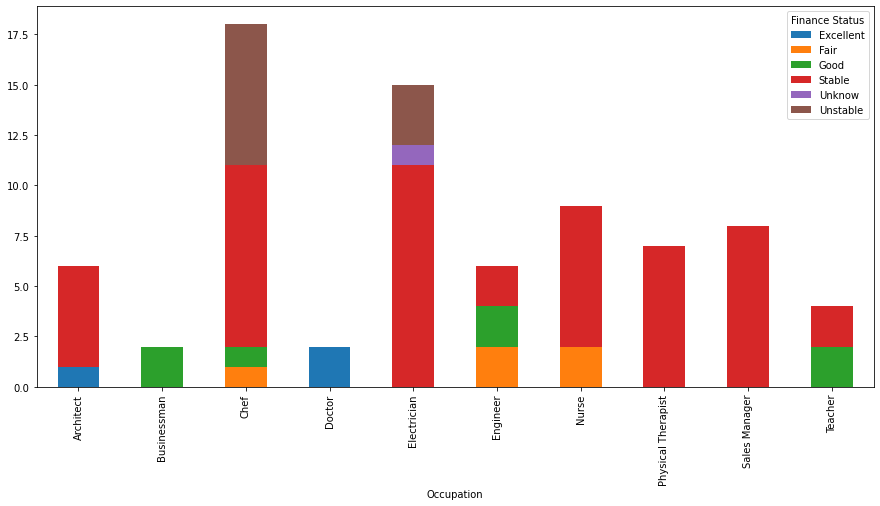

In [19]:
df1 = df[df['Occupation'].isin(occ_income.Occupation)]
df1.groupby('Occupation')['Finance Status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

# PRE PROCESSING

In [23]:
df_copy = df[df['Number of Children']!='na']
df_copy['Number of Children'] = df_copy['Number of Children'].astype(int)
df_copy['Years of Employment'] = df_copy['Years of Employment'].astype(int)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in df_copy.columns:
    if df_copy[c].dtype == 'object':
        df_copy[c] = le.fit_transform(df_copy[c])

In [25]:
X = df_copy.drop('Car',axis=1)
y = df_copy['Car']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((228, 7), (58, 7), (228,), (58,))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# OUTLIER DETECTION

In [29]:
def out_iqr(df , column):
    global lower,upper
    q1, q3 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q3 - q1
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q1 - cut_off, q3 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
out_iqr(df,'Credit Score')

The IQR is 93.0
The lower bound value is 517.5
The upper bound value is 889.5
Total number of outliers are 3


# MODELS

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report

Model is: LogisticRegression()
Predictions are : [0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
Confusion matrix : 
 [[ 9  5]
 [ 3 41]]
Outcome values : 
 9 5 3 41
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.93      0.91        44
           0       0.75      0.64      0.69        14

    accuracy                           0.86        58
   macro avg       0.82      0.79      0.80        58
weighted avg       0.86      0.86      0.86        58

Accuracy : 86.2 %
Precision : 75.0 %
Recall : 64.3 %
F1 Score : 0.692
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 78.8 %
roc_auc_score: 0.787


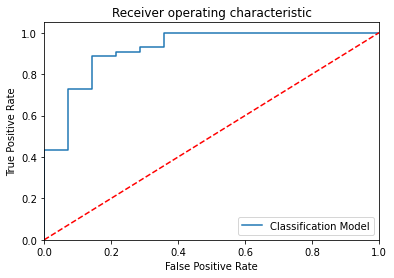

Model is: DecisionTreeClassifier()
Predictions are : [0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]
Confusion matrix : 
 [[13  1]
 [11 33]]
Outcome values : 
 13 1 11 33
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.75      0.85        44
           0       0.54      0.93      0.68        14

    accuracy                           0.79        58
   macro avg       0.76      0.84      0.77        58
weighted avg       0.87      0.79      0.81        58

Accuracy : 79.3 %
Precision : 54.2 %
Recall : 92.9 %
F1 Score : 0.684
Specificity or True Negative Rate : 75.0 %
Balanced Accuracy : 84.0 %
roc_auc_score: 0.839


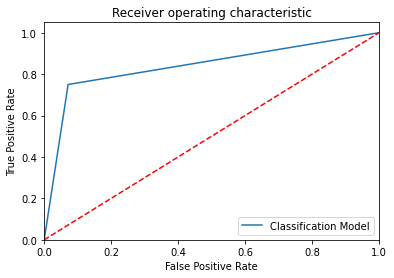

Model is: RandomForestClassifier()
Predictions are : [0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
Confusion matrix : 
 [[13  1]
 [ 7 37]]
Outcome values : 
 13 1 7 37
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.84      0.90        44
           0       0.65      0.93      0.76        14

    accuracy                           0.86        58
   macro avg       0.81      0.88      0.83        58
weighted avg       0.90      0.86      0.87        58

Accuracy : 86.2 %
Precision : 65.0 %
Recall : 92.9 %
F1 Score : 0.765
Specificity or True Negative Rate : 84.1 %
Balanced Accuracy : 88.5 %
roc_auc_score: 0.885


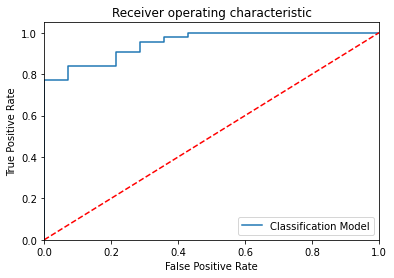

Model is: ExtraTreesClassifier()
Predictions are : [0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix : 
 [[12  2]
 [ 3 41]]
Outcome values : 
 12 2 3 41
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.93      0.94        44
           0       0.80      0.86      0.83        14

    accuracy                           0.91        58
   macro avg       0.88      0.89      0.89        58
weighted avg       0.92      0.91      0.91        58

Accuracy : 91.4 %
Precision : 80.0 %
Recall : 85.7 %
F1 Score : 0.828
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 89.5 %
roc_auc_score: 0.894


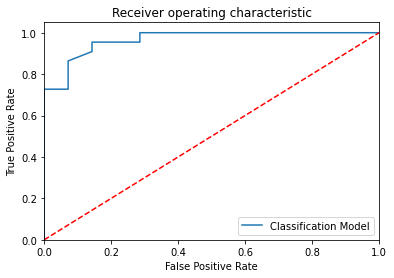

Model is: KNeighborsClassifier()
Predictions are : [0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion matrix : 
 [[11  3]
 [ 4 40]]
Outcome values : 
 11 3 4 40
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.91      0.92        44
           0       0.73      0.79      0.76        14

    accuracy                           0.88        58
   macro avg       0.83      0.85      0.84        58
weighted avg       0.88      0.88      0.88        58

Accuracy : 87.9 %
Precision : 73.3 %
Recall : 78.6 %
F1 Score : 0.759
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 84.8 %
roc_auc_score: 0.847


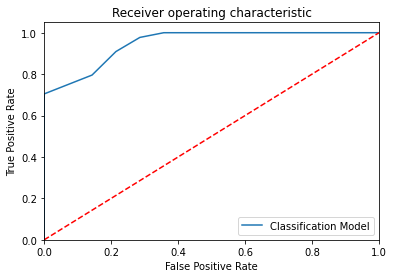

Model is: GaussianNB()
Predictions are : [0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
Confusion matrix : 
 [[11  3]
 [ 4 40]]
Outcome values : 
 11 3 4 40
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.91      0.92        44
           0       0.73      0.79      0.76        14

    accuracy                           0.88        58
   macro avg       0.83      0.85      0.84        58
weighted avg       0.88      0.88      0.88        58

Accuracy : 87.9 %
Precision : 73.3 %
Recall : 78.6 %
F1 Score : 0.759
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 84.8 %
roc_auc_score: 0.847


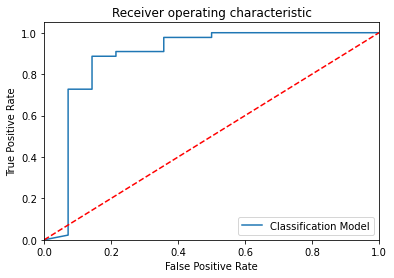

In [31]:
res = pd.DataFrame()

lr = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
etree = ExtraTreesClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

Models = [lr,tree,rf,etree,knn,gnb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    
    # confusion matrix
    matrix = confusion_matrix(y_test,prediction)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,prediction).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(y_test,prediction,labels=[1,0])
    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    
    # ROC Curve
    print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))
    
    logit_roc_auc = roc_auc_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('='*80)
    
    model_dict = {'Model Name' : model, 
                  'True Positive' : tp, 
                  'False Negative' : fn, 
                  'False Positive' : fp,
                  'True Negative' : tn,
                  'Accuracy' : accuracy,
                  'Precision' : precision,
                  'Recall' : sensitivity,
                  'F1 Score' : f1Score,
                  'Specificity' : specificity,
                  'ROC_AUC_Score':roc_auc_score(y_test, prediction),
                  'Balanced Accuracy':balanced_accuracy}   
    res = res.append(model_dict,ignore_index=True)

In [32]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=res['Accuracy']
out['Precision']=res['Precision']
out['Recall']=res['Recall']
out['F1 Score']=res['F1 Score']
out['True Positive']=res['True Positive']
out['False Negative']=res['False Negative']
out['False Positive']=res['False Positive']
out['True Negative']=res['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,ExtraTreesClassifier,0.914,0.800,0.857,0.828,12,2,3,41
1,KNeighborsClassifier,0.879,0.733,0.786,0.759,11,3,4,40
2,GaussianNB,0.879,0.733,0.786,0.759,11,3,4,40
3,RandomForestClassifier,0.862,0.650,0.929,0.765,13,1,7,37
4,LogisticRegression,0.862,0.750,0.643,0.692,9,5,3,41
5,DecisionTreeClassifier,0.793,0.542,0.929,0.684,13,1,11,33


In [33]:
y_pred=etree.predict(X_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df_copy.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'Yes',inplace=True)
out['actual'].replace(0,'No',inplace=True)
out['predicted'].replace(1,'Yes',inplace=True)
out['predicted'].replace(0,'No',inplace=True)
out.sample(10)

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,actual,predicted
425,39,3200.0,630.0,3,5,3,0,0,No,No
442,27,6500.0,710.0,5,3,6,1,1,Yes,Yes
166,3,8500.0,780.0,7,3,6,1,2,Yes,Yes
111,47,2800.0,630.0,1,5,4,0,0,No,No
474,86,5800.0,690.0,4,3,6,1,0,Yes,Yes
418,76,4400.0,670.0,4,3,6,1,1,Yes,Yes
131,31,12000.0,830.0,8,3,6,1,1,Yes,Yes
369,28,3700.0,642.0,3,3,6,1,1,Yes,Yes
396,97,7500.0,775.0,6,3,6,1,0,Yes,Yes
366,0,5800.0,710.0,5,3,6,1,1,Yes,Yes
